In [405]:
#required modules
import numpy as np
import pandas as pd
import os
import random
from matplotlib import pyplot as plt
import math

In [406]:
#define functions
#create_circle require 2 input , 2 output 
#create_legs require 3 inpput , 2 output 
#sampling_function require 3 input,2 output
#total_sampled require 6 input,2 output
#data_sampled_with_noise require 9 input,2 output
#plotting require 9 input,2 output

In [407]:
###################################################################################
########################create_circle function#####################################
###################################################################################

#function to create circle with total point equel points parameter,radius parameter 
def create_circle(radius=1,points=100):
    #input radius,points
    #return x,y
    
    ########################################################################
    angle = np.linspace( 0 , 2 * np.pi , points ) 
    x = radius * np.cos( angle ) 
    y = radius * np.sin( angle ) 
    print('circle created')
    
    ########################################################################
    
    return x.tolist(),y.tolist()


###################################################################################
#########################create_legs function######################################
###################################################################################

#function to create 4 legs with length of leg equel limit parameter and sep par to show distance between two point in the leg
def create_legs(radius=5,limit=10,seperate=0.1):
    #input radius,limit,sep
    #return x,y
    
    ########################################################################
    
    x=[]
    y=[]
    for i in range(0,limit,1):
        #right corner
        i=i*seperate
        x.append(radius+i)
        y.append(0)
        #left corner
        x.append((-1*radius)-i)
        y.append(0)
        #upper corner
        x.append(0)
        y.append(radius+i)
        #bottom corner
        x.append(0)
        y.append((-1*radius)-i)
    print('legs created')
    
    ########################################################################
    
    return x,y

###################################################################################
##########################sampling function########################################
###################################################################################

#function to sample the input data with sampling_rate parameter
def sampling_function(x,y,sampling_rate=0.9):
    #input x,y,sampling_rate
    #return x,y
    
    ########################################################################
    
    sampled_x=[]
    sampled_y=[]
    
    total_index=len(x)
    index_list=[i for i in range(total_index)]
    random_sampling=random.choices(index_list,k=int(total_index*sampling_rate)  )
    for i in random_sampling:
        sampled_x.append(x[i])
        sampled_y.append(y[i])
    print('data sampled')
    
    ########################################################################
    
    return sampled_x,sampled_y
    
    
###################################################################################
########################get final data function####################################
###################################################################################
    
#final function to return sampled data for leg and circule
def total_sampled(number_of_points,radius,len_of_leg,len_of_sep,sampling_rate_circle,sampling_rate_leg):
    #input number of point to circule,len_of_leg,len_of_sep,sampling rate for both
    #return x,y
    
    ########################################################################
    
    #get circle,leg data
    x_circle,y_circle=create_circle(points=number_of_points,radius=radius)
    x_leg,y_leg=create_legs(radius=radius,limit=len_of_leg,seperate=len_of_sep)
    
    #sampling circle , leg data
    x_circle_sampled,y_circle_sampled=sampling_function(x_circle,y_circle,sampling_rate_circle)
    x_leg_sampled,y_leg_sampled=sampling_function(x_leg,y_leg,sampling_rate_leg)
    
    total_x=x_circle_sampled+x_leg_sampled
    total_y=y_circle_sampled+y_leg_sampled
    print('finishing sampling')
    
    ########################################################################
    
    return total_x,total_y

###################################################################################
#########################add noise to the data function############################
###################################################################################

def data_sampled_with_noise(number_of_points,radius,len_of_leg,len_of_sep,sampling_rate_circle,sampling_rate_leg,noise_size,mu,sigma):
    #total_sampled(number_of_points,radius,len_of_leg,sampling_rate_circle,sampling_rate_leg):
    #changes you can make
    #number_of_points increate the circle shape
    #radius to control the the size of circle
    #leng_of_leg to control the size of leg
    #sampling_rate_circle to control sampling size of circle
    #sampling_rate_leg to control sampling size of leg
    
    ########################################################################
    
    x,y=total_sampled(
        number_of_points,
        radius,
        len_of_leg,
        len_of_sep,
        sampling_rate_circle,
        sampling_rate_leg
    )
    x=np.array(x)
    y=np.array(y)
    noise_x = np.random.normal(mu,sigma, x.shape)
    noise_y = np.random.normal(mu,sigma, y.shape)
    print('noise add')
    new_x = x + noise_size*noise_x
    new_y=y+noise_size*noise_y
    
    ########################################################################
    
    return new_x,new_y

###################################################################################
#########################plotting_data function####################################
###################################################################################

def plotting_data_with_saving(path,number_of_points,radius,len_of_leg,len_of_sep,sampling_rate_circle,sampling_rate_leg,noise_size,mu,sigma):
    #getting data
    x,y=data_sampled_with_noise(
        number_of_points,
        radius,
        len_of_leg,len_of_sep,
        sampling_rate_circle,
        sampling_rate_leg,
        noise_size,mu,sigma
        )
    print('plotting')
    #plotting data
    plt.axis('off')
    plt.scatter(x,y , alpha= 0.8, c='black', s=15)
    
    ########################
    
    #saving the file in the folder
    last_element=os.listdir(path) #list dir in folder name
    if len(last_element)==0:
            count=0
    else:
        count=[int(last_element[i][:-4]) for i in range(len(last_element))] #last element it the folder
        count=max(count)
    count+=1
    plt.savefig(path+'//'+str(count)+'.jpg') #save plot
    plt.show()
        
    if input('you want to save it yes ,no ?  ')=='no':
        os.remove(path+'//'+str(count)+'.jpg')

circle created
legs created
data sampled
data sampled
finishing sampling
noise add
plotting


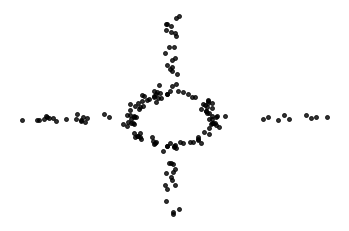

you want to save it yes ,no ?  yes


In [409]:
#change thesis parameters to change result
number_of_points=100 
radius=20
len_of_leg=20
len_of_sep=3
sampling_rate_circle=0.9
sampling_rate_leg=0.9
noise_size=1
mean=0
standard_dev=2
#path to the folder you want to save the image
path_to_folder='G://final_project//roundabout'

plotting_data_with_saving(path_to_folder,
    number_of_points,radius,
    len_of_leg,
    len_of_sep,
    sampling_rate_circle,
    sampling_rate_leg,
    noise_size,
    mean,
    standard_dev)


1
